In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('dark_background')

In [2]:
df = pd.read_csv('influencers.csv')
df.describe()

,id,followerCount,engagementRate
count,100.000000,100.000000,100.00000
mean,50.500000,28632.160000,2.28800
std,29.011492,20220.341175,1.87133
min,1.000000,1526.000000,0.10000
25%,25.750000,14257.250000,0.90000
50%,50.500000,23802.500000,2.00000
75%,75.250000,39845.250000,3.12500
max,100.000000,95117.000000,9.40000


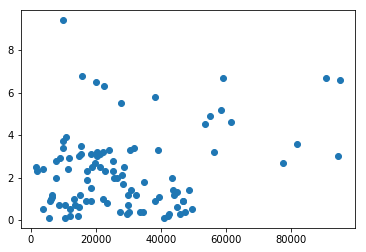

In [3]:
plt.plot(df['followerCount'],df['engagementRate'],'o')
followers,engagement = df['followerCount'].values,df['engagementRate'].values

In [5]:
followers_label = ['FEW','AVERAGE','MANY','HUGE']
target_label = ['REJECTED','CONSIDERED','ACCEPTED']
engagement_label = ['LOW','MED','HIGH']

# 85%
# followers_points = [[0, 15000, 25000], [15000, 25000, 45000, 55000], [45000, 55000, 75000, 85000], [75000, 85000, 999999]]
# engagement_points = [[0, 0, 2], [0, 2, 4, 6], [4, 6, 9]]
# target_points_sugeno = [35, 55, 100]
# target_points = [[0, 35, 40], [35, 40, 55, 60], [55, 60, 100]]

# 90%
# followers_points = [[0, 10000, 15000], [10000, 15000, 35000, 40000], [35000, 40000, 55000, 60000], [55000, 60000, 9999999]]
# engagement_points =[[0, 1, 3], [1, 3, 4, 6], [4, 6, 9]]
# target_points_sugeno = [35, 55, 100]
# target_points = [[0, 25, 30], [25, 30, 55, 60], [55, 60, 100]]

# 95%
# f_diff = 3000
# f_cut = [10000, 30000, 70000, 9999999]
# e_diff = 0.5
# e_cut = [2, 5, 10]
# t_diff = 5
# t_cut = [30, 60, 100]
# followers_points = [[0, f_cut[0]-f_diff, f_cut[0]],
#                     [f_cut[0]-f_diff, f_cut[0], f_cut[1]-f_diff, f_cut[1]],
#                     [f_cut[1]-f_diff, f_cut[1], f_cut[2]-f_diff, f_cut[2]],
#                     [f_cut[2]-f_diff, f_cut[2], f_cut[3]]
#                    ]
# engagement_points = [[0, e_cut[0] - e_diff, e_cut[0]],
#                     [e_cut[0]-e_diff, e_cut[0], e_cut[1] - e_diff, e_cut[1]],
#                     [e_cut[1]-e_diff, e_cut[1], e_cut[2]]
#                    ]
# target_points_sugeno = t_cut
# target_points = [[0, t_cut[0] - t_diff, t_cut[0]],
#                 [t_cut[0] - t_diff, t_cut[0], t_cut[1] - t_diff, t_cut[1]],
#                 [t_cut[1] - t_diff, t_cut[1], t_cut[2]]
#                 ]

#100%💯
f_diff = 3500
f_cut = [10000, 30000, 70000, 9999999]
e_diff = 0.7
e_cut = [2.5, 5.5, 10]
t_diff = 5
t_cut = [30, 60, 100]
followers_points = [[0, f_cut[0]-f_diff, f_cut[0]],
                    [f_cut[0]-f_diff, f_cut[0], f_cut[1]-f_diff, f_cut[1]],
                    [f_cut[1]-f_diff, f_cut[1], f_cut[2]-f_diff, f_cut[2]],
                    [f_cut[2]-f_diff, f_cut[2], f_cut[3]]
                   ]
engagement_points = [[0, e_cut[0] - e_diff, e_cut[0]],
                    [e_cut[0]-e_diff, e_cut[0], e_cut[1] - e_diff, e_cut[1]],
                    [e_cut[1]-e_diff, e_cut[1], e_cut[2]]
                   ]
target_points_sugeno = t_cut
target_points = [[0, t_cut[0] - t_diff, t_cut[0]],
                [t_cut[0] - t_diff, t_cut[0], t_cut[1] - t_diff, t_cut[1]],
                [t_cut[1] - t_diff, t_cut[1], t_cut[2]]
                ]
print(followers_points,engagement_points,target_points,sep='\n')

[[0, 6500, 10000], [6500, 10000, 26500, 30000], [26500, 30000, 66500, 70000], [66500, 70000, 9999999]]
[[0, 1.8, 2.5], [1.8, 2.5, 4.8, 5.5], [4.8, 5.5, 10]]
[[0, 25, 30], [25, 30, 55, 60], [55, 60, 100]]


In [5]:
def decrease(x,a,b):
    return -(x-b)/(b-a) 
def increase(x,a,b):
    return (x-a)/(b-a)

In [6]:
def fx_few_followers(x):
    p = followers_points[0]
    if x <= p[1]:
        return 1;
    elif p[1]< x < p[2]:
        return decrease(x,p[1],p[2])
    else:
        return 0;
def fx_average_followers(x):
    p = followers_points[1]
    if p[0] < x < p[1]:
        return increase(x,p[0],p[1]) 
    elif p[1] <= x <= p[2]:
        return 1;
    elif p[2] < x <= p[3]:
        return decrease(x,p[2],p[3])
    else:
        return 0;
def fx_many_followers(x):
    p = followers_points[2]
    if p[0] < x < p[1]:
        return increase(x,p[0],p[1]) 
    elif p[1] <= x <= p[2]:
        return 1;
    elif p[2] < x <= p[3]:
        return decrease(x,p[2],p[3])
    else:
        return 0;
def fx_huge_followers(x):
    p = followers_points[3]
    if x >= p[1]:
        return 1;
    elif p[0] < x < p[1]:
        return increase(x,p[0],p[1])
    else:
        return 0;

In [7]:
def fx_low_engagement(x):
    p = engagement_points[0]
    if x <= p[1]:
        return 1;
    elif p[1] < x < p[2]:
        return decrease(x,p[1],p[2])
    else:
        return 0;
def fx_med_engagement(x):
    p = engagement_points[1]
    if p[0] < x < p[1]:
        return increase(x,p[0],p[1]) 
    elif p[1] <= x <= p[2]:
        return 1;
    elif p[2] < x <= p[3]:
        return decrease(x,p[2],p[3])
    else:
        return 0;
def fx_high_engagement(x):
    p = engagement_points[2]
    if x >= p[1]:
        return 1;
    elif p[0] < x < p[1]:
        return increase(x,p[0],p[1])
    else:
        return 0;

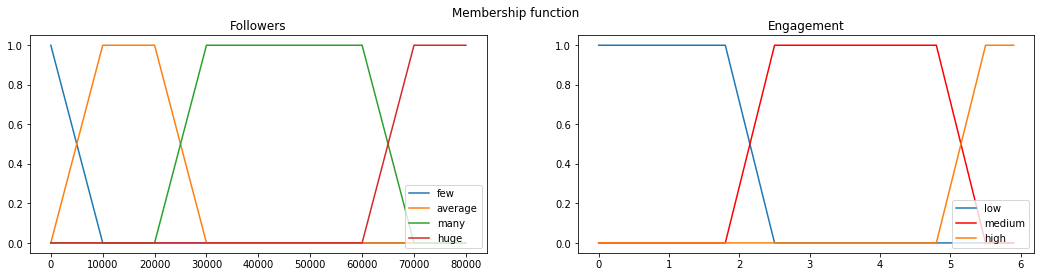

In [8]:
x = np.arange(0,90000,10000)
x2 = np.arange(0,6,0.1)
fig, ax = plt.subplots(1,2,figsize=(18, 4))
ax[0].plot(x,[fx_few_followers(y) for y in x], label='few')
ax[0].plot(x,[fx_average_followers(y) for y in x], label='average')
ax[0].plot(x,[fx_many_followers(y) for y in x], label='many')
ax[0].plot(x,[fx_huge_followers(y) for y in x], label='huge')
ax[0].set_title('Followers')
ax[0].legend(loc='lower right')
ax[1].plot(x2,[fx_low_engagement(y) for y in x2], label='low')
ax[1].plot(x2,[fx_med_engagement(y) for y in x2], label='medium',color='r')
ax[1].plot(x2,[fx_high_engagement(y) for y in x2], label='high')
ax[1].set_title('Engagement')
ax[1].legend(loc='lower right')
fig.suptitle('Membership function')
plt.plot()
plt.savefig('membership_function.png')

### Defuzzyfication rules

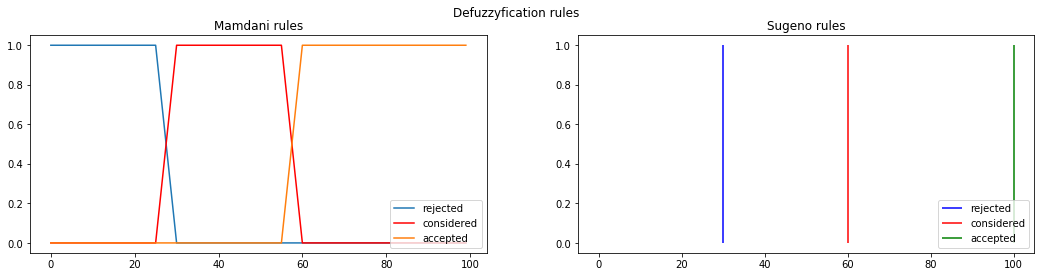

In [23]:
def fx_rejected(x):
    p = target_points[0]
    if x <= p[1]:
        return 1;
    elif p[1] < x < p[2]:
        return decrease(x,p[1],p[2])
    else:
        return 0;
def fx_considered(x):
    p = target_points[1]
    if p[0] < x < p[1]:
        return increase(x,p[0],p[1]) 
    elif p[1] <= x <= p[2]:
        return 1;
    elif p[2] < x <= p[3]:
        return decrease(x,p[2],p[3])
    else:
        return 0;
def fx_accepted(x):
    p = target_points[2]
    if x >= p[1]:
        return 1;
    elif p[0] < x < p[1]:
        return increase(x,p[0],p[1])
    else:
        return 0;
x3 = np.arange(0,100)
fig, ax = plt.subplots(1,2,figsize=(18, 4))
ax[0].plot(x3, [fx_rejected(y) for y in x3], label='rejected')
ax[0].plot(x3, [fx_considered(y) for y in x3], label='considered',color='r')
ax[0].plot(x3, [fx_accepted(y) for y in x3], label='accepted')
ax[0].set_title('Mamdani rules')
ax[0].legend(loc='lower right')
ax[1].vlines(x = target_points_sugeno[0], ymin = 0, ymax = 1, label='rejected', color='b')
ax[1].vlines(x = target_points_sugeno[1], ymin = 0, ymax = 1, label='considered',color='r')
ax[1].vlines(x = target_points_sugeno[2], ymin = 0, ymax = 1, label='accepted',color='g')
ax[1].vlines(0,0,1,visible=False)
ax[1].set_title('Sugeno rules')
ax[1].legend(loc='lower right')
fig.suptitle('Defuzzyfication rules')
plt.plot()
plt.savefig('defuzzyfication_rules.png')

In [10]:
def fuzzyfication():
    fuzzyset_followers, fuzzyset_engagement = [],[]
    for i in followers:
        temp = [[followers_label[0],fx_few_followers(i)],
               [followers_label[1],fx_average_followers(i)],
               [followers_label[2],fx_many_followers(i)],
               [followers_label[3],fx_huge_followers(i)]]
        fuzzyset_followers.append(temp)
    for i in engagement:
        temp = [[engagement_label[0],fx_low_engagement(i)],
                [engagement_label[1],fx_med_engagement(i)],
                [engagement_label[2],fx_high_engagement(i)]]
        fuzzyset_engagement.append(temp)
    return fuzzyset_followers, fuzzyset_engagement

### Inference rules

In [11]:
rule = [[0, 0,2],[0, 0, 2],[0, 1, 2] , [1, 1, 2]]
df_rule = pd.DataFrame(rule, index = followers_label, columns = engagement_label).replace({0:target_label[0],1:target_label[1],2:target_label[2]})
df_rule

,LOW,MED,HIGH
FEW,REJECTED,REJECTED,ACCEPTED
AVERAGE,REJECTED,REJECTED,ACCEPTED
MANY,REJECTED,CONSIDERED,ACCEPTED
HUGE,CONSIDERED,CONSIDERED,ACCEPTED


In [12]:
def inference(x, y):
    results = []
    for i in range(len(x)):
        classes = {}
        for fol in x[i]:
            for eng in y[i]:
                key = df_rule[eng[0]][fol[0]]
                value = min(eng[1],fol[1])
                if key not in classes.keys():
                    classes[key] = value
                else:
                    classes[key] = max(value, classes[key])
        results.append(classes)
    return results

In [25]:
def defuzzyfication(inferences,style='mamdani'):
    score = []
    for i in inferences :
        if style == 'mamdani':
            μB = []
            points = np.arange(5,100,5)
            for p in points:
                reject = i['REJECTED'] if fx_rejected(p) > 0 else 0
                consider = i['CONSIDERED'] if fx_considered(p) > 0 else 0
                accept = i['ACCEPTED'] if fx_accepted(p) > 0 else 0
                μB.append(max(reject,consider,accept))
            zμB = [μB[i] * points[i] for i in range(len(points))]
            z = sum(zμB)/sum(μB)
            score.append(z)
        elif style == 'sugeno':
            p = target_points_sugeno
            reject = i['REJECTED'] 
            consider = i['CONSIDERED'] 
            accept = i['ACCEPTED']
            μB = (reject * p[0] + consider * p[1] + accept * p[2])
            z = μB / (reject + consider + accept) if μB> 0 else 0
            score.append(z)
        else :
            score = np.zeros(len(inferences))
            print('not supported yet')
    return score

In [24]:
style = 'mamdani'
fuzzyset_followers, fuzzyset_engagement = fuzzyfication()
x = inference(fuzzyset_followers,fuzzyset_engagement)
score = defuzzyfication(x,style)
df['Score'] = score

In [26]:
# df.sort_values(by=['Score'],ascending=False).to_csv('result.csv')
output = df.sort_values(by=['Score'],ascending=False).head(20)
filename = 'output_'+style+'.csv'
output.to_csv(filename,header=True,index=False)
print(' >>> Top 20 users <<<')
print('  method :',style)
output

 >>> Top 20 users <<<
  method : mamdani


,id,followerCount,engagementRate,Score
99,100,15788,6.8,77.500000
10,11,95117,6.6,77.500000
58,59,58987,6.7,77.500000
73,74,22394,6.3,77.500000
38,39,9890,9.4,77.500000
1,2,38237,5.8,77.500000
92,93,27657,5.5,77.500000
47,48,19925,6.5,77.500000
12,13,90773,6.7,77.500000
59,60,58403,5.2,64.900000


### Test the accuracy

In [27]:
df_test = df.copy()
df_test['FolxEng'] = followers*engagement
df_test = df_test.sort_values(by=['FolxEng'],ascending=False)
test = df_test['id'].head(20).values
data = df.sort_values(by=['Score'],ascending=False).head(20)['id'].values
count = 0
for i in data :
    if i in test:
        count+=1
    else:
        print(i)
print('Accuracy : ',count/20*100,'%')

Accuracy :  100.0 %


*&copy; Copyright 2019 Anvaqta Tangguh Wisesa.*